In [17]:
from mean_reversion_algo import MeanReversionAlgo
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Trading Algorithm 

We define our strategy as an intraday mean-reversion. We look for "biggest loss days" and "biggest win days". 
We want to probe at an answer to the question: what happened the following day? 

In so far as yesterday's losers gain today, or vice versa, this should be more actionable. We can always look up who was yesterday's biggest loser. We don't need any further info. Does this alone give us an edge? 

What if we condition on winners/losers above a certain threshold? What if we condition on the index being overal up/down? Find out! 

We allow the opportunity to import data from the 1) Dow-Jones index, 2) the Nasdaq and 3) the Nifty50. 

## How do you use the algorithm? (simple case) 
index_algo = MeanReversionAlgo(index='dow')
index_algo.run()

#### Pure plot without conditions
index_algo.plot_results()

#### Conditional plot based on index performance up
index_algo.plot_results(index_condition='up')

#### Conditional plot based on winners, up more than 5%, on days when the index was down
index_algo.plot_results(index_condition='down', category_condition={'type': 'winner', 'thresholds': (5, None)})

#### Conditional correlation winners, up more than 30%, on days when the index was up
index_algo.calculate_segmented_correlation(index_condition='up', category_condition={'type': 'winner', 'thresholds': (30, None)})

## Let's look at the Dow in the period from Jan20 up until last week. 

Fetching data for 29 tickers in the dow index...
Successfully fetched data for all tickers.
Calculating percentage changes for all tickers...
Calculating correlations...
General: Correlation: -0.04, T-statistic: -1.17, Observations: 1060
Positive Index Performance: Correlation: 0.07, T-statistic: 1.64, Observations: 571
Negative Index Performance: Correlation: -0.14, T-statistic: -3.14, Observations: 488
Plotting results...


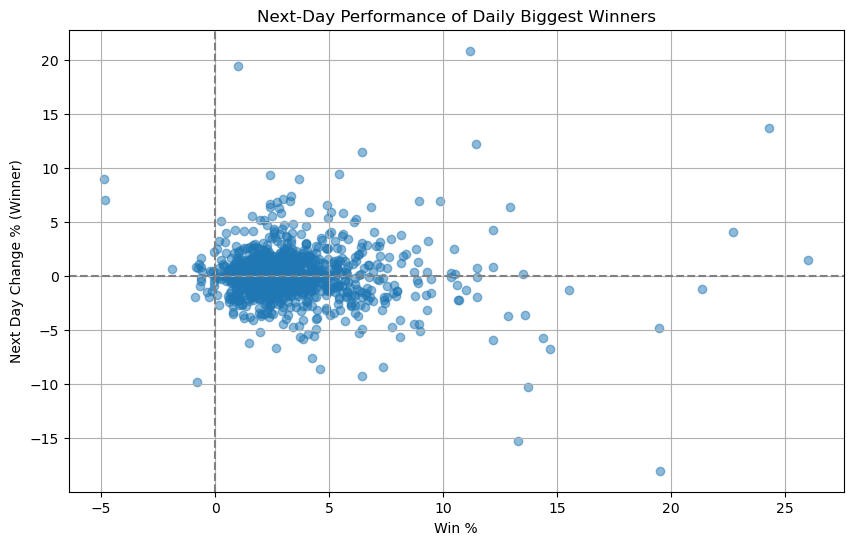

Analysis complete.


In [11]:
dow = MeanReversionAlgo(index='dow', start_date="01/01/2020", end_date="22/03/2024")
dow.run()

## Let's check out what happens if we control for index-overall, and whether you're a winner/loser

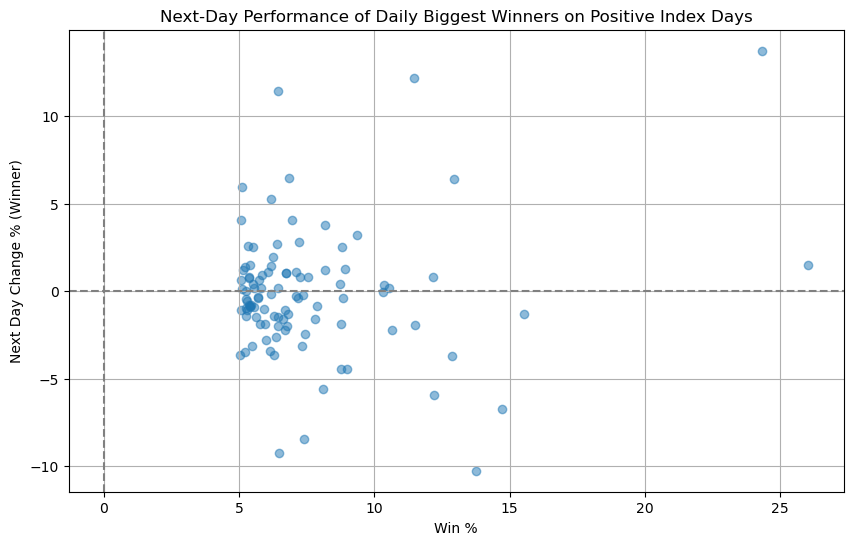

In [4]:
dow.plot_results(index_condition='up', category_condition={'type': 'winner', 'thresholds': (5, None)})

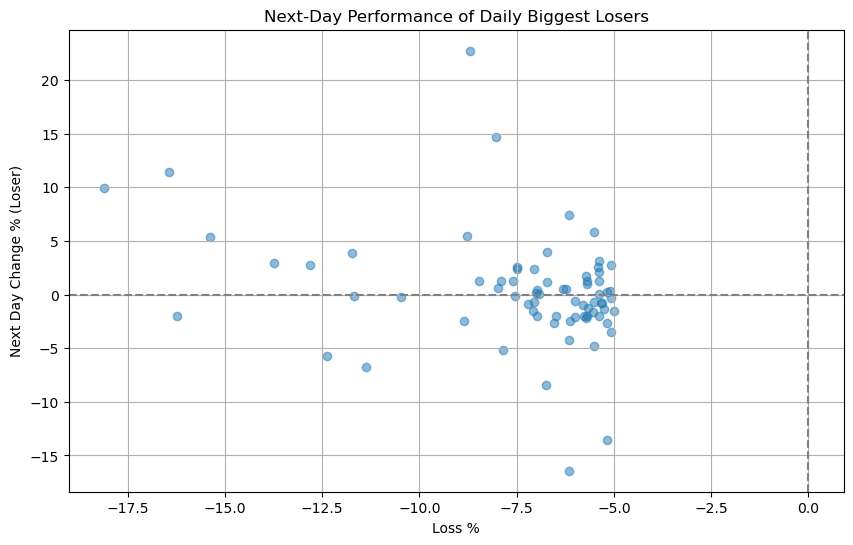

In [5]:
dow.plot_results(index_condition='down', category_condition={'type': 'loser', 'thresholds': (5, None)})

## Now let's turn to Nifty 50 

Fetching data for 30 tickers in the nifty50 index...
Failed to fetch data for 1 tickers.
Calculating percentage changes for all tickers...
Calculating correlations...
General: Correlation: 0.10, T-statistic: 3.33, Observations: 1046
Positive Index Performance: Correlation: 0.08, T-statistic: 2.00, Observations: 621
Negative Index Performance: Correlation: 0.12, T-statistic: 2.40, Observations: 424
Plotting results...


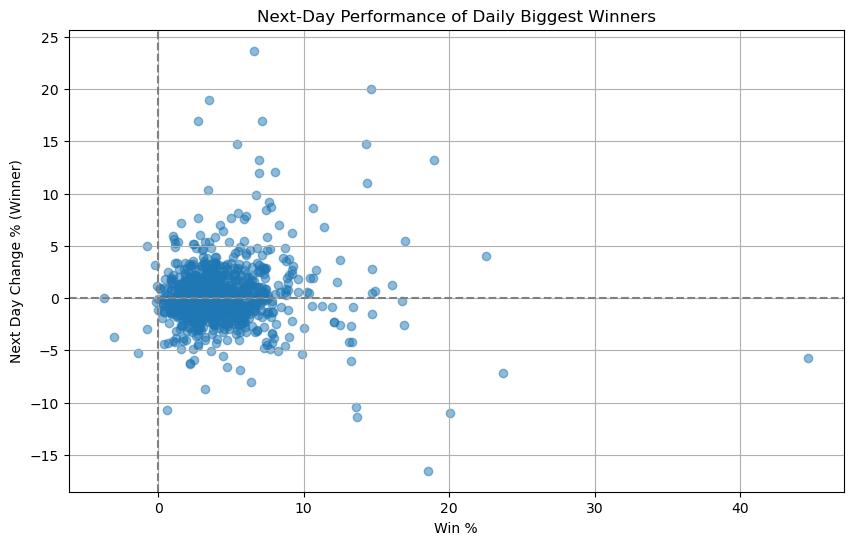

Analysis complete.


In [7]:
nifty = MeanReversionAlgo(index='nifty50', start_date="01/01/2020", end_date="22/03/2024")
nifty.run()

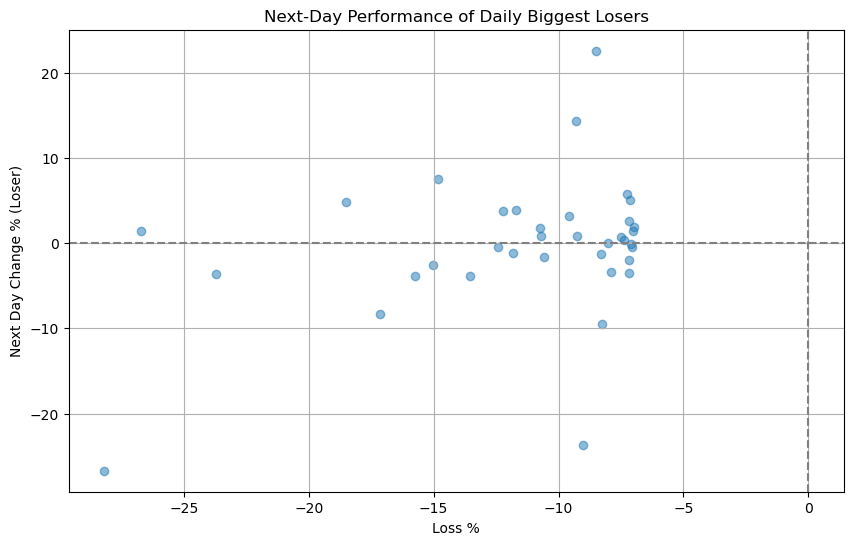

In [9]:
nifty.plot_results(index_condition='down', category_condition={'type': 'loser', 'thresholds': (7, None)})

## Finally, let's do Nasdaq (be warned ... 
... dataset larger, so this will take a while  

Fetching data for 4419 tickers in the nasdaq index...
Failed to fetch data for 83 tickers.
Calculating percentage changes for all tickers...
Calculating correlations...
General: Correlation: -0.17, T-statistic: -4.49, Observations: 653
Positive Index Performance: Correlation: -0.27, T-statistic: -2.80, Observations: 103
Negative Index Performance: Correlation: -0.04, T-statistic: -0.44, Observations: 109
Plotting results...


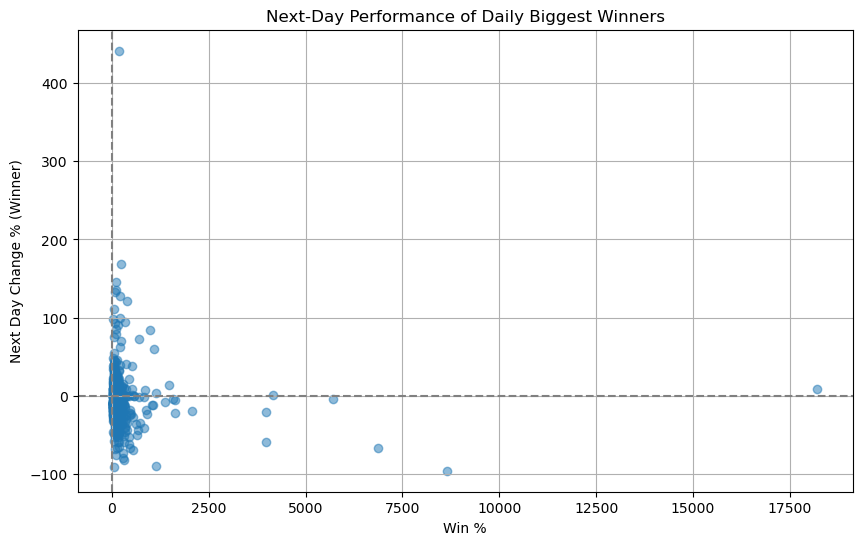

Analysis complete.


In [4]:
nasdaq = MeanReversionAlgo(index='nasdaq', start_date="01/01/2020", end_date="22/03/2024")
nasdaq.run()

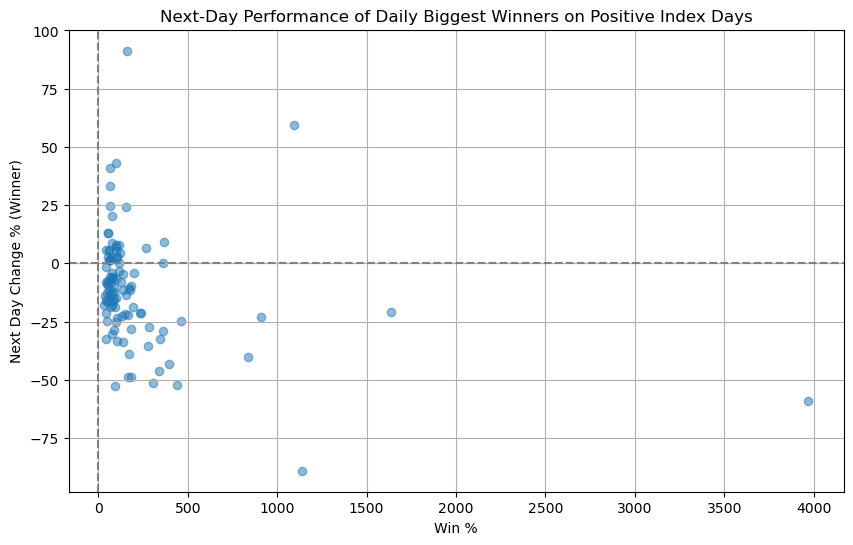

In [9]:
nasdaq.plot_results(index_condition='up', category_condition={'type': 'winner', 'thresholds': (30, None)})

In [21]:
nasdaq.calculate_segmented_correlation(index_condition='up', category_condition={'type': 'winner', 'thresholds': (30, None)})

Correlation: -0.281, P-value: 0.00403, Sample size: 103


#### Tentative Conclusion: 
If the highest gainer on the Nasdaq goes up by more than 30%, maybe you should bet on it going down the next day. Odds are pretty good. 